[View in Colaboratory](https://colab.research.google.com/github/shravankumar9892/coloi/blob/master/coloi.ipynb)

# COLOI
You can visit the project webiste through this link: [COLOI](https://sites.google.com/view/coloi/)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [66]:
# GPU Support 
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('NVIDIA Tesla K80 not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# Loading image file into colab
test = drive.CreateFile({'id':'1IvMZz_80xtTmPzmbhVIvdMgEh0idWX_4'})
test.GetContentFile('ai_image.jpeg')

test_1 = drive.CreateFile({'id':'1jjt1IikQnWxD9lhP42HXyzVTj9lo-hS2'})
test_1.GetContentFile('woman.jpeg')

train = drive.CreateFile({'id': '1HzIKgbXGKcAvwsygYOTb4S3Sqxtn96ns'})
train.GetContentFile('man.jpg')

# **Object Detection**
![Inception](https://www.tensorflow.org/images/AlexClassification.png)

In [1]:
# Libraries

# Installing OpenCV is the hardest part as there are several compatibility issues, 
# i.e 32/64 bit differences, other libraries could be of older versions, etc.

import keras
from keras.applications import inception_v3
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
import cv2
import sys
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Taking input
# For object detection resize = (224, 224)
# resize has to be a tuple 

def input_image(size):                     
  image_file = input('Enter the image file: ')
  img = cv2.imread(image_file, 1)            # Remember wrong image name will not give you an error.
  if size == None:
    pass
  else:
    img = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting bgr into rgb values.
  return img

In [0]:
# Expanding image dimension along axis 0 on calling the function input_image
img = np.expand_dims(input_image(size = (224, 224)), axis=0)

In [0]:
# Process the image by subtracting the mean of R, G, B respectively with the elements of the image array

input_img = inception_v3.preprocess_input(img.copy()) 

In [0]:
# Loading the pre-trained model
with tf.device('/gpu:0'):
  model = inception_v3.InceptionV3(weights='imagenet')

In [0]:
# Prediction
predictions = model.predict(input_img)
predictions = decode_predictions(predictions)

In [0]:
print('This image contains: \n\n' + predictions[0][0][1]+ ' with a % probability of: ' + str(predictions[0][0][2]*100))
print(predictions[0][1][1]+ ' with a % probability of: ' + str(predictions[0][1][2]*100))
print(predictions[0][2][1]+ ' with a % probability of: ' + str(predictions[0][2][2]*100))
print(predictions[0][3][1]+ ' with a % probability of: ' + str(predictions[0][3][2]*100))
print(predictions[0][4][1]+ ' with a % probability of: ' + str(predictions[0][4][2]*100))

 **With Bounding Boxes**
 
 
 
 [Face detection](https://github.com/shravankumar9892/Real-Time-Face-Recognition/blob/master/face_detection/opencv/without_webcam/face_detection.py)

In [0]:
# Passing image and cascade names as command-line arguments imagePath should be dir location of the image you want detection for.
imagePath = sys.argv[1]

# For face detection keep:
cascPath = '../haarcascade_frontalface_default.xml'

# Initializing the face cascade from the xml file given via the arguments in cascPath.
# Cascade is just an xml file containing face detection data.
faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image. Many operations in OpenCV are done in grayscale. Remember OpenCV loads images as BGR images.
image = cv2.imread(imagePath)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# IMPORTANT PART

# Detect faces in the image
# The detectMultiScale function is a general function that detects objects. Since we are calling it on the face cascade, that’s what it detects.
# scale factor compensates for different different sizes of face in the image.
# The detection algorithm takes up a small window os size == minSize and hovers it throughout the image. But generally minSize is smaller than the size of the face, hence we define a parameter called minNeighbors which says how many objects are detected near the current one before it declares the face found. 

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

# The function returns a list of rectangles in which it believes it found a face.
print("Found {0} faces!".format(len(faces)))

# Next, we will loop over where it thinks it found something and draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow("Faces Detected", image)
cv2.waitKey(0)

# Face Recognition



[Object Recognition](https://github.com/shravankumar9892/Real-Time-Face-Recognition/tree/master/face_recognition/with_webcam)

Click 'q' to **Quit**

In [2]:
# Getting a reference to webcam
video_capture = cv2.VideoCapture(0)

# Loading a sample picture for Trainig
images = ['IMG_20180827_161245.jpg']
image = [face_recognition.load_image_file("Helper_Files/"+i) for i in images]

# Creating arrays of known face encodings and their names
encoding = [face_recognition.face_encodings(i)[0] for i in image]

# Initializing man's name randomly and lets see if algorithm can recognize Drake.
known_face_names = ["Shravan"]

# Initializing some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Taking a single frame of video
    ret, frame = video_capture.read()

    # Resizing frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color to RGB color 
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Finding all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(encoding, face_encoding)
            name = "unknown face"

            # If a match was found in known_face_encodings, just use the first one.
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Displaying the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Drawing a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Drawing a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Displaying the resulting image
    cv2.imshow('Output', frame)

    # Hit 'q'  to quit!!!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.
cv2.destroyAllWindows()

# Color Spaces
![Color Space](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzCvTgNUnzRZzQ82_sTKnYj0GWqktiU8GlFNRr9TEPIDXSDPg5)

#### Various Types of Color Spaces available, run the code cell below

In [0]:
def flags():
  # To get flags, just run following code cell :
  flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
  print(flags)
  return None

#### Color Space Conversion

In [0]:
# Find suitable flag values from the function flags

def color_spaces(image, flag, save = False, show = True):
  img = cv2.cvtColor(image, flag)
  if show == True:
    plt.imshow(img)
    plt.show()
  else:
    pass
  if save == True:
    cv2.imwrite(input('Image shall be saved with which name? ', img))

# Image Colorization
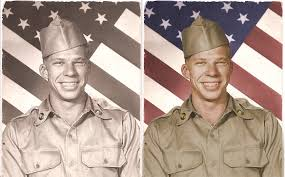

In [5]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


#### Preprocessing

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import cv2

# Get images
image = img_to_array(load_img('man.jpg'))
image = np.array(image, dtype=float)

# Only use it while testing, and comment out every other code below in this code cell.
#image = rgb2gray(image)

X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = cv2.resize(X, (400, 400))
Y = cv2.resize(Y, (400, 400))

X = np.expand_dims(X, axis = 0)
X = np.expand_dims(X, axis = 3)
Y = np.expand_dims(Y, axis = 0)

In [0]:
# OPENCV :/

# input_image converts an image file, aka. jpeg, png, etc, into a numpy array
# with the rgb values of image.

def input_image(size):                     
  image_file = input('Enter the image file: ')
  img = cv2.imread(image_file, 1)            # Remember wrong image name will not give you an error.
  if size == None:
    pass
  else:
    img = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting bgr into rgb values.
  return img

def LAB(image, reverse = False, split = False):
    # To load the image use input_image() which is defined above
    if reverse == 'False':
      lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    else:
      lab = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    if split == 'False':  
      return lab
    else:
      return lab[:, :, 0], lab[:, :, 1:]
    
def convert_dtype(array):
  return array.astype(eval(input('which dtype do you need? ')))
 
# OPENCV :/

img = input_image((400, 400))
X, y = LAB(img, split = True) # LAB gives error which input array has a dtype of float :/
X = convert_dtype(X)
y = convert_dtype(y)
X = np.expand_dims(X, axis = 2)
X = np.expand_dims(X, axis = 0)
y = np.expand_dims(y, axis = 0)  

#### Model

In [0]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [0]:
model.compile(optimizer='rmsprop', loss='mse')

#### Training

In [13]:
with tf.device('/gpu:0'):
  model.fit(x=X, y=Y, batch_size=1, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0159
Epoch 2/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0154
Epoch 3/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0100
Epoch 4/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0164
Epoch 5/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0847
Epoch 6/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0143
Epoch 7/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0065
Epoch 8/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0072
Epoch 9/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0075
Epoch 10/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0084
Epoch 11/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0057
Epoch 12/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0054
Epoch 13/1000
1/1 [==================

#### Predictions

In [19]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128

1/1 [==============================] - 0s 14ms/step
0.0014667222276329994


Original Image: 


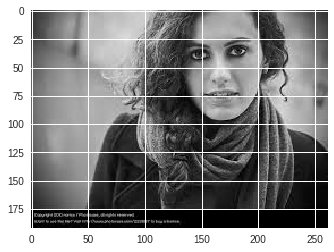

Predicted Image: 


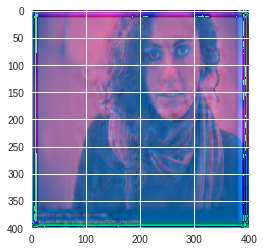

In [100]:
# SKIMAGE Works! :D

from google.colab import files
from skimage.transform import resize

img = cv2.imread('woman.jpeg')
keep_shape = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Original Image: ")
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)/255.0#rgb2gray(img)
img = cv2.resize(img, (400, 400))
img = np.expand_dims(img, axis = 2)
img = np.expand_dims(img, axis = 0)
output = model.predict(img)
output *= 128

# Output colorizations
output = np.squeeze(output, axis = 0)
img = np.squeeze(img, axis = 3)
img = np.squeeze(img, axis = 0)
cur = np.zeros((400, 400, 3))
cur[:,:,0] = img
cur[:,:,1:] = output
cur = cv2.resize(cur, (400, 400))
print("Predicted Image: ")
plt.imshow(cur)
plt.show()
#cv2.imwrite("colorized_image.jpeg", cur)
#files.download("colorized_image.jpeg")

In [0]:
# OPENCV -- Doesn't work :/ Forget it xD

from google.colab import files

# Initializing final LAB image
cur = np.zeros((400, 400, 3))
#X[0][:,:,0][:, :, None].astype('Float64')

# Assigning values to cur
cur[:,:,0][:, :, None] = X[0][:,:,0][:, :, None]
cur[:,:,1:] = output[0]

# Concatenating L ( from input) and UV (from output)
cur = np.dstack((cur[:, :, 0], cur[:, :, 1:]))

# Converting into LAB color space
cur = LAB(cur, split = False, reverse = True)

# Downloading the files
cv2.imwrite("img_result.png", cur)
files.download('img_result.png')

### Loading thousands of images to Colab